In [1]:
import librosa
from sklearn import svm
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Here parameter ( file is label ) of oneFile, i.e. ( oneFile is some Audio File i.e. .wav file)
# This fuction will extract features of the Audio File, Horizontally stack all features.

def Wav_File_features(file, oneFile):
    y, sr = librosa.load(os.getcwd() + '\\' + file + '\\' + oneFile)
    stft = np.abs(librosa.stft(y))
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
    contrast_spectrogram =np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0) 
    return (np.hstack([mfcc,melspectrogram,chroma,tonnetz,contrast_spectrogram]))


In [3]:
# This function will be used for both (extracting features of all Audio .wav fies ) from Training_Dataset and Test_Dataset as well

def All_File_Features():
    features = []
    labels = []
    fourFiles = os.listdir()
    for file in fourFiles:
        AudioFiles = os.listdir(os.path.join(os.getcwd(), file))
        for oneFile in AudioFiles:
            X = Wav_File_features(file, oneFile)
            features.append(X)
            labels.append(file)
    return features,labels

In [4]:
# This function will return all ( features and labels ) of all the files in Test_Dataset

def test_features():
    os.chdir(os.path.join(os.getcwd(), 'Test'))
    features, labels = All_File_Features()
    current_path = os.getcwd()
    parent_path = os.path.dirname(os.getcwd())
    os.chdir(parent_path)
    return features, labels

In [5]:
# This function will return all ( features and labels ) of all the files in Train_Dataset

def train_features():
    os.chdir(os.path.join(os.getcwd(), 'Train'))
    features, labels = All_File_Features()
    current_path = os.getcwd()
    parent_path = os.path.dirname(os.getcwd())
    os.chdir(parent_path)
    return features, labels

In [6]:
#This function will predict us Accuracy score or the score of prediction made by the Model.

def Predict():
    featuresForTest, labelsForTest = test_features()
    prediction = model.predict(featuresForTest)
    print('Accuracy Score: ' + str(accuracy_score(labelsForTest, prediction)))
    score = model.score(featuresForTest, labelsForTest)
    print('Score: ', score)

In [7]:
# This function will generate a scatterplot of features using ( Training_Dataset )

def scatterplot(features,labels):
    frame = pd.DataFrame(features)
    totla_columns = len(frame.columns)
    frame1 = frame.iloc[:, :totla_columns//2]
    frame2 = frame.iloc[:, totla_columns//2:]
    df = pd.DataFrame(frame1.mean(axis=1),columns=['first_half'])
    df['second_half'] = frame2.mean(axis=1)
    df['labels'] = labels
    color_dict = {'Angry': 'red', 'Sad':'blue', 'Neutral':'green', 'Happy':'yellow'}
    sns.scatterplot(data=df, x = 'first_half', y = 'second_half', hue = "labels", palette = color_dict)

In [8]:
# This function will predict emotion for one Audio file. You can change label, and name of file to test emotion in the file.

def predict_Emotion():
    os.chdir(os.path.join(os.getcwd(), 'Test'))
    featureForSadFile = Wav_File_features('Sad', 'SM25_F34_S084.wav')
    current_path = os.getcwd()
    parent_path = os.path.dirname(os.getcwd())
    os.chdir(parent_path)
    print(model.predict([featureForSadFile]))

In [9]:

os.chdir(os.path.join(os.getcwd(), 'SERDataset'))
features, labels = train_features()               #Step 01    


In [10]:
model.fit(features, labels)    #Step 02

SVC(C=10000000000.0, kernel='linear')

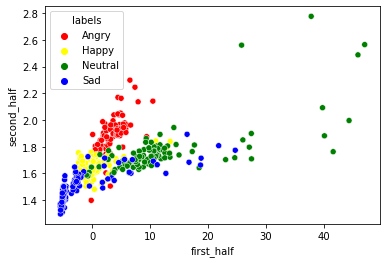

In [11]:
scatterplot(features,labels)   #Step 03

In [12]:
Predict()                      #Step 04_1

Accuracy Score: 1.0
Score:  1.0


In [13]:
predict_Emotion()              #Step 04_2

['Sad']
